<a href="https://colab.research.google.com/github/frikaya12/Credit_Model_Project/blob/main/Credit_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit


In [ ]:
df =pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
pd.set_option('display.max_rows',df.shape[0]+1)

In [ ]:
pd.set_option('display.max_rows',10)

In [ ]:
df

In [ ]:
df.info()

NameError: name 'df' is not defined

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Credit_History,50
Self_Employed,32
LoanAmount,22
Dependents,15
Loan_Amount_Term,14
...,...
Education,0
ApplicantIncome,0
CoapplicantIncome,0
Property_Area,0


In [ ]:
df.describe()

In [ ]:
df.describe(include='O')

In [ ]:
cat_data=[]
num_data=[]
for i,c in enumerate(df.dtypes):
  if c==object :

    cat_data.append(df.iloc[:,i])
  else:


    num_data.append(df.iloc[:,i])

In [ ]:
cat_data

In [ ]:
cat_data=pd.DataFrame(cat_data).transpose()
num_data=pd.DataFrame(num_data).transpose()



In [ ]:
num_data

In [ ]:
cat_data=cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [ ]:
cat_data.isnull().sum().any()

False

In [ ]:
num_data.fillna(method='bfill',inplace=True)
num_data.isnull().sum().any()


<ipython-input-38-beb45ae1f24a>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  num_data.fillna(method='bfill',inplace=True)


False

In [ ]:
num_data


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,128.0,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0
610,4106.0,0.0,40.0,180.0,1.0
611,8072.0,240.0,253.0,360.0,1.0
612,7583.0,0.0,187.0,360.0,1.0


In [ ]:
target_value={'Y':1 ,'N':0 }

In [ ]:
target=cat_data['Loan_Status']
cat_data.drop('Loan_Status',axis=1,inplace=True)
target=target.map(target_value)
target


,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [ ]:
le=LabelEncoder()
for i in cat_data.columns:
  cat_data[i]=le.fit_transform(cat_data[i])

cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,0,0,2
1,1,1,1,1,0,0,0
2,2,1,1,0,0,1,2
3,3,1,1,0,1,0,2
4,4,1,0,0,0,0,2
...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0
610,610,1,1,3,0,0,0
611,611,1,1,1,0,0,2
612,612,1,1,2,0,0,2


In [ ]:
df.drop('Loan_ID',axis=1,inplace=True)

In [ ]:
X=pd.concat([cat_data,num_data],axis=1)
y=target

In [ ]:
target.value_counts()

,count
Loan_Status,
1,422
0,192


Le pourcentage des crédits accordés est 31.27%


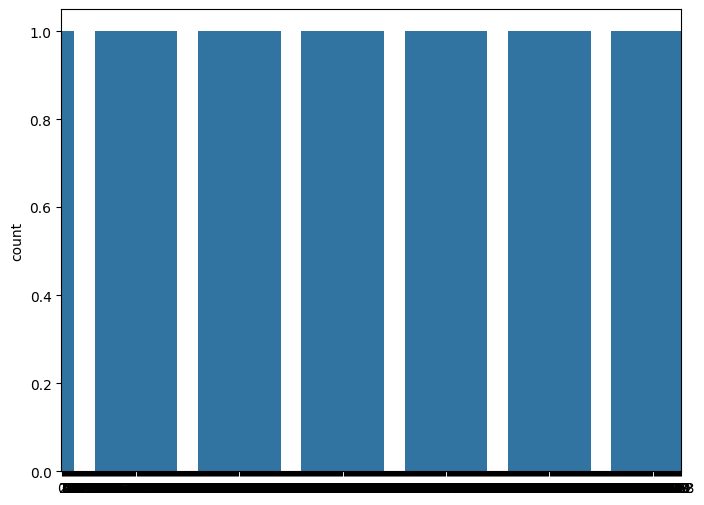

In [ ]:

plt.figure(figsize=(8, 6))
sns.countplot(target)
yes = target.value_counts()[0] / len(target)
no = target.value_counts()[1] / len(target)
print(f'Le pourcentage des crédits accordés est {yes:.2%}')



In [ ]:
df=pd.concat([cat_data,num_data,target] ,axis=1)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


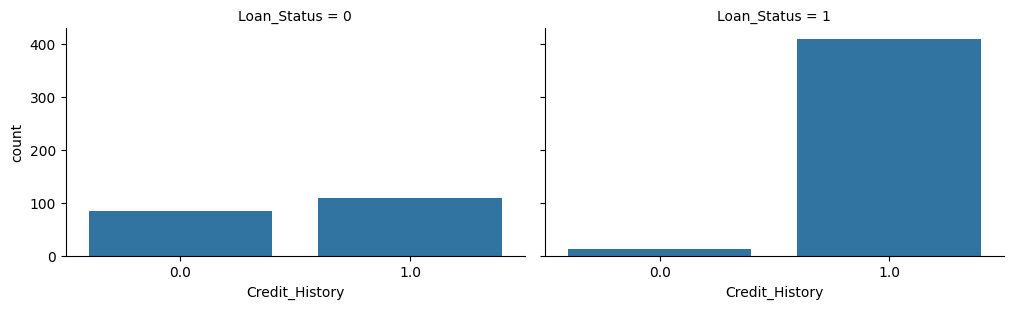

In [ ]:
grid = sns.FacetGrid(df, col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Credit_History')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


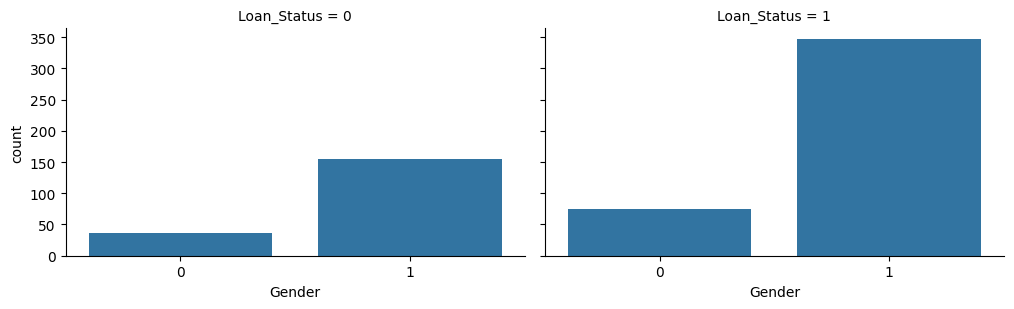

In [ ]:
grid = sns.FacetGrid(df, col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Gender')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


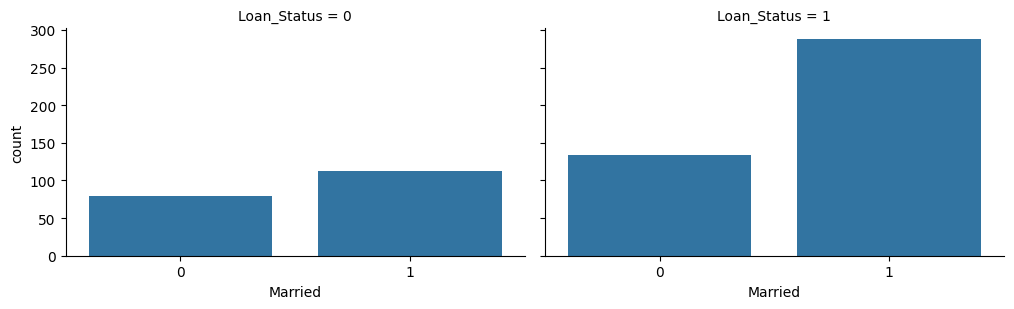

In [ ]:
grid = sns.FacetGrid(df, col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Married')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


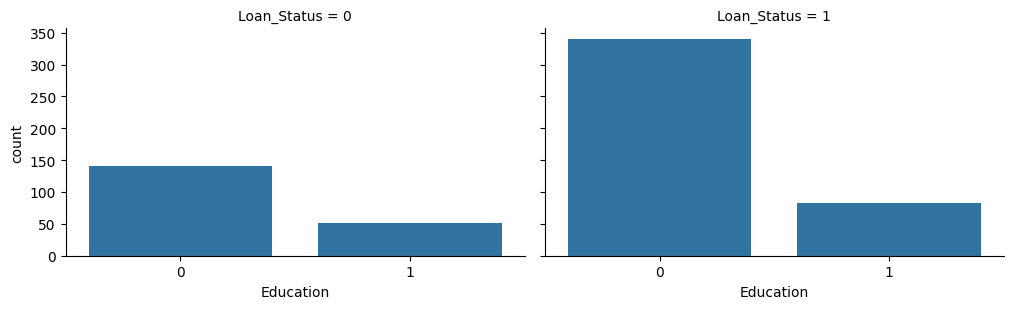

In [ ]:
grid = sns.FacetGrid(df, col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Education')

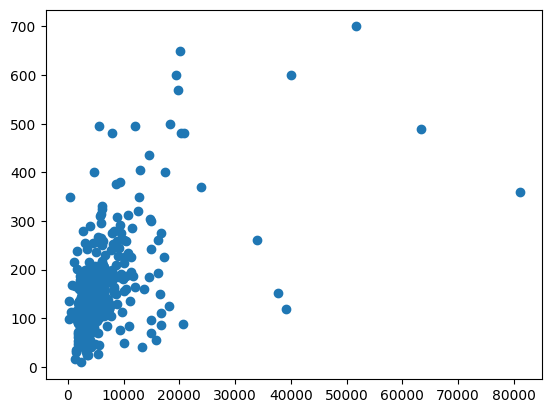

In [ ]:
plt.scatter(df['ApplicantIncome'],df['LoanAmount'])

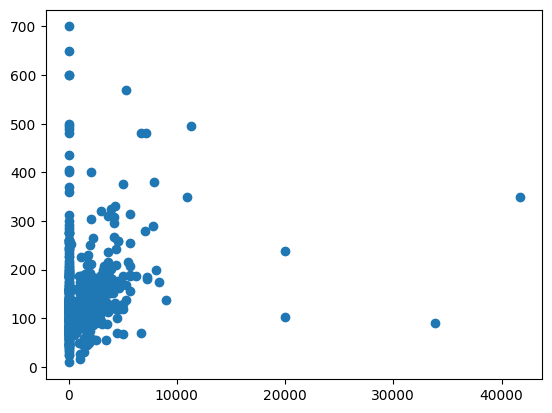

In [ ]:
plt.scatter(df['CoapplicantIncome'],df['LoanAmount'])

In [ ]:
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train,test in sss.split(X,y):
  X_train,X_test=X.iloc[train],X.iloc[test]
  y_train,y_test=y.iloc[train],y.iloc[test]

In [ ]:
models = {
    'LogisticRegression':LogisticRegression(random_state=42),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(max_depth=1,random_state=42)
}

# La fonction de précision
def accu(y_true,y_pred,retu=False):
    acc=accuracy_score(y_true,y_pred)
    if retu:
        return acc
    else:
        print(f'la precision du modèle est: {acc}')

# c'est la fonction d'application des modèles
def train_test_eval(models,X_train,y_train,X_test,y_test):
    for name,model in models.items():
        print(name,':')
        model.fit(X_train,y_train)
        accu(y_test,model.predict(X_test))
        print('-'*30)


In [ ]:
train_test_eval(models,X_train,y_train,X_test,y_test)

LogisticRegression :
la precision du modèle est: 0.8536585365853658
------------------------------
KNeighborsClassifier :
la precision du modèle est: 0.6097560975609756
------------------------------
DecisionTreeClassifier :
la precision du modèle est: 0.8455284552845529
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
X_2=X[['Credit_History','Married','CoapplicantIncome']]

In [ ]:
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train,test in sss.split(X_2,y):
  X_train,X_test=X_2.iloc[train],X_2.iloc[test]
  y_train,y_test=y.iloc[train],y.iloc[test]

In [ ]:
train_test_eval(models,X_train,y_train,X_test,y_test)

LogisticRegression :
la precision du modèle est: 0.8536585365853658
------------------------------
KNeighborsClassifier :
la precision du modèle est: 0.6991869918699187
------------------------------
DecisionTreeClassifier :
la precision du modèle est: 0.8455284552845529
------------------------------


In [ ]:
Classifier=LogisticRegression()
Classifier.fit(X_2,y)

LogisticRegression()

In [ ]:
pickle.dump(Classifier,open('model.pkl','wb'))